In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Resnet 20

In [2]:
model=tf.keras.models.load_model('../input/resnetv220cifar10/resnet20v2.h5')


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [3]:
def pweight():
    for layer in model.layers:
        for weight in layer.weights:
            print(weight.name,weight.numpy())

In [4]:
kk=[j for j in range(25)]

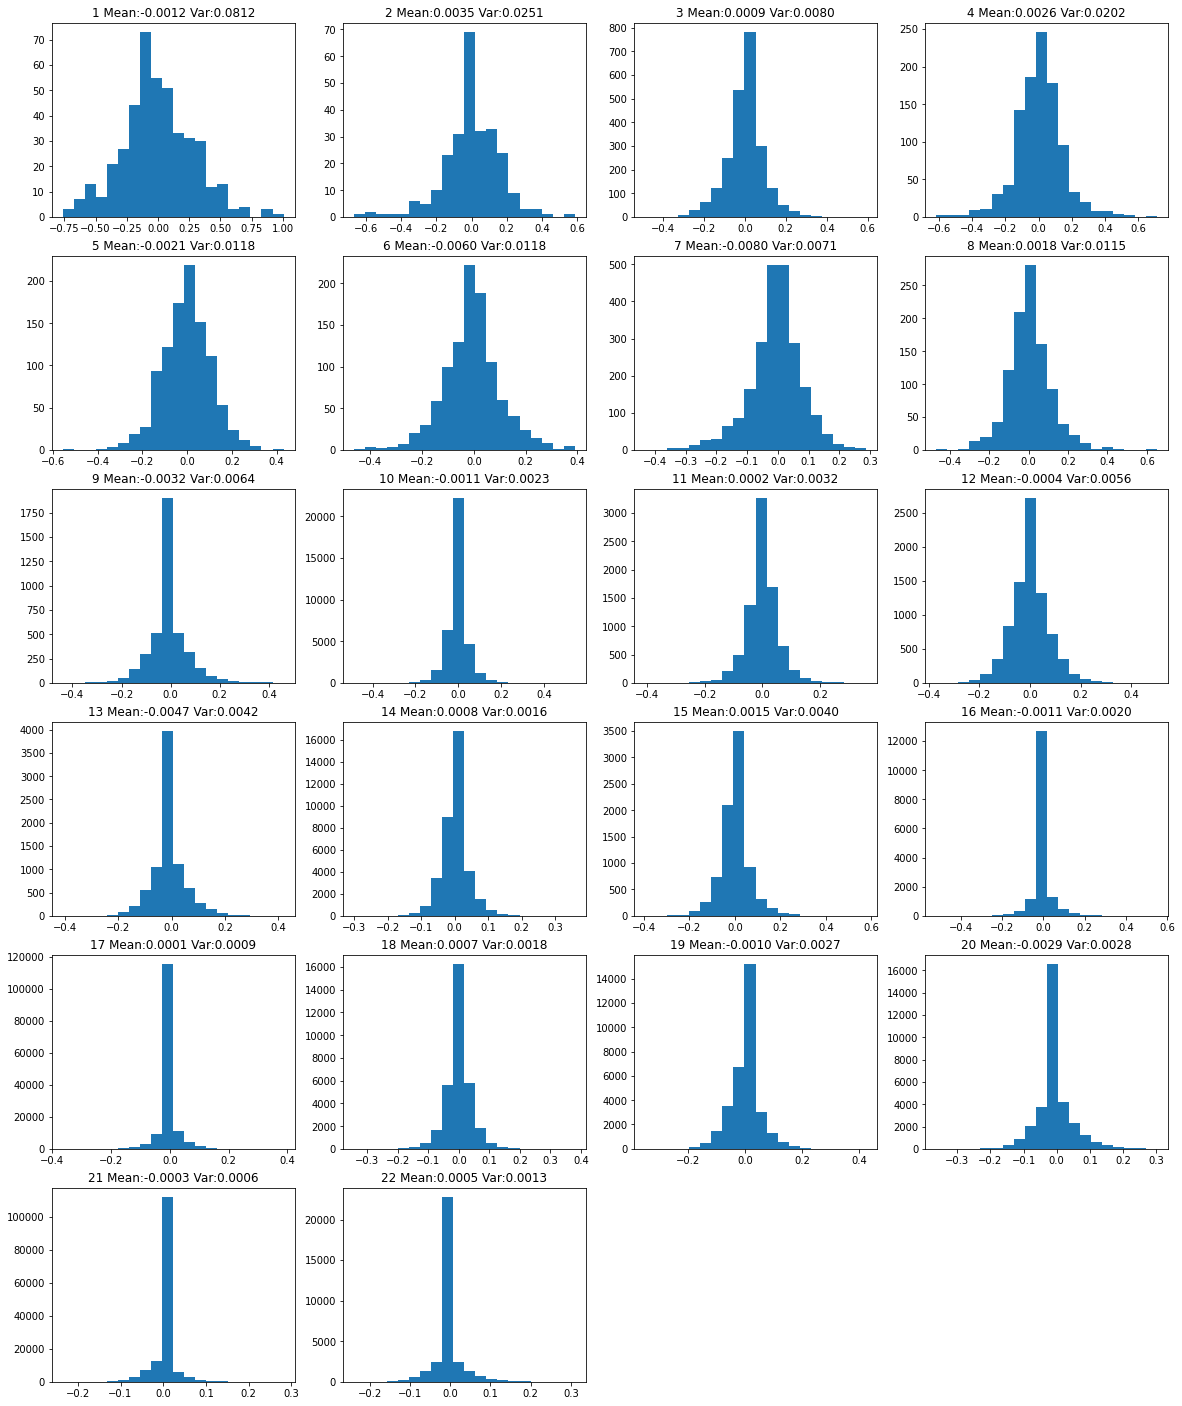

In [5]:
i=0
plt.figure(figsize=(20,25))
for layer in model.layers:
    if "conv2d" in layer.name:
        i+=1
        plt.subplot(6,4,kk[i])
        x=layer.weights[0].numpy().reshape(-1)
        plt.hist(x,bins=20)
        plt.title("%d Mean:%.4f Var:%.4f" %(i,x.mean(),x.var()))

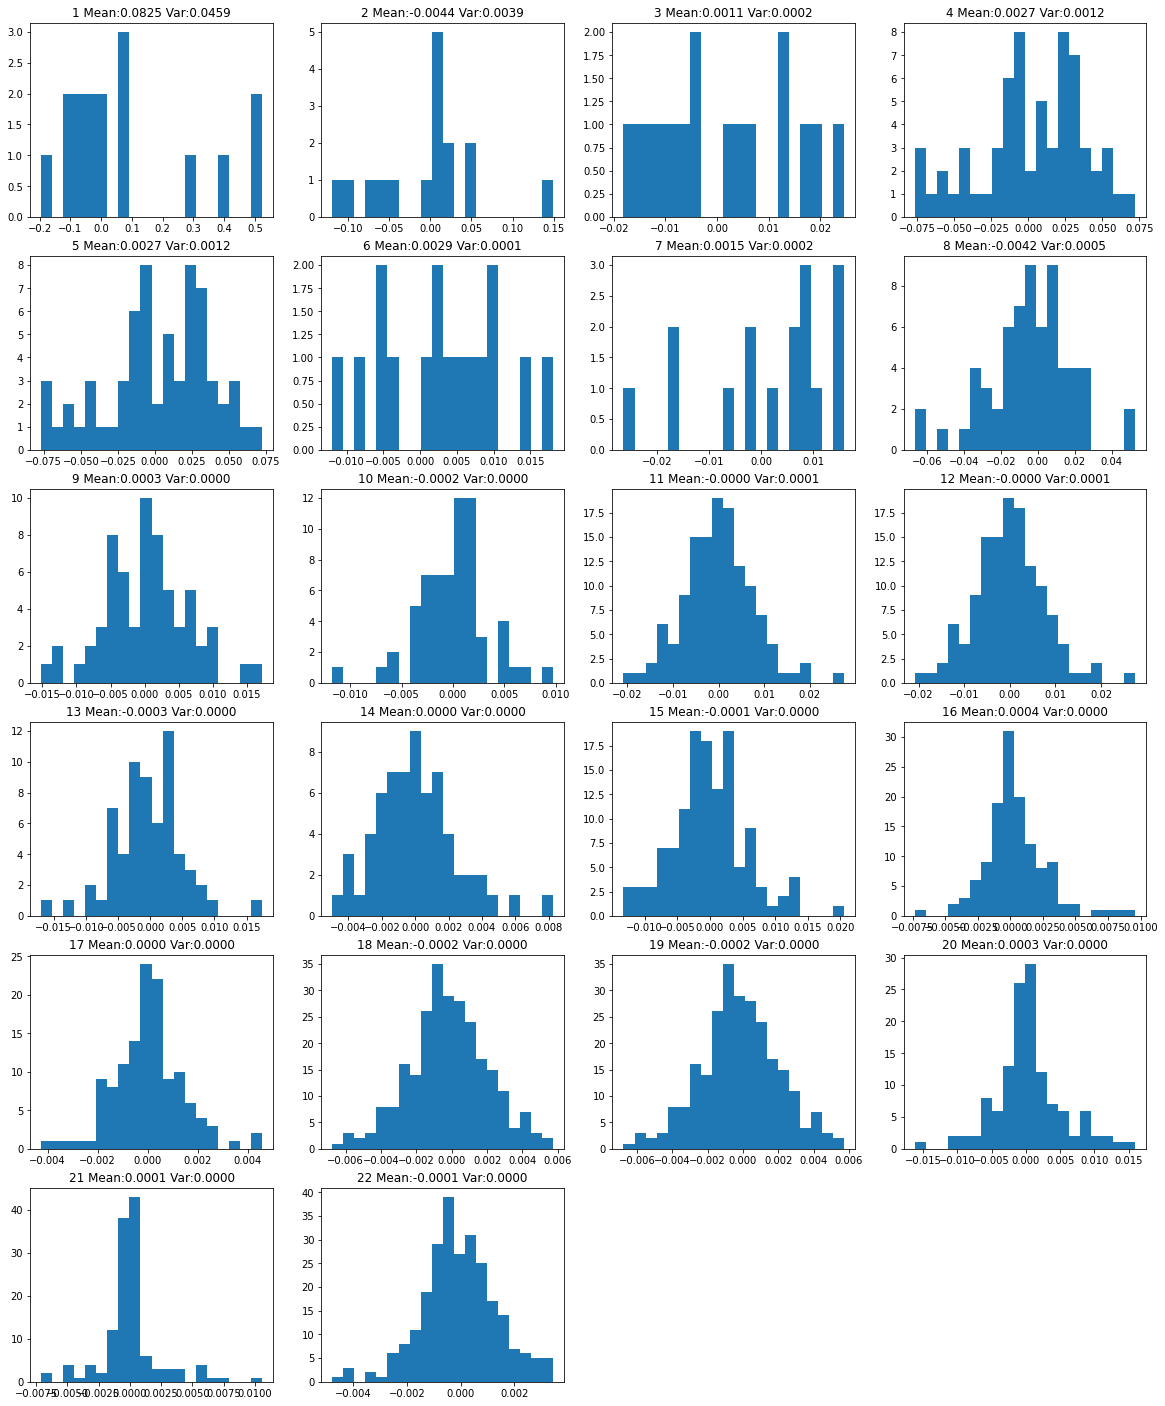

In [6]:
i=0
plt.figure(figsize=(20,25))
for layer in model.layers:
    if "conv2d" in layer.name:
        i+=1
        plt.subplot(6,4,kk[i])
        x=layer.weights[1].numpy().reshape(-1)
        plt.hist(x,bins=20)
        plt.title("%d Mean:%.4f Var:%.4f" %(i,x.mean(),x.var()))

In [7]:
i=0
for layer in model.layers:
    if "conv2d" in layer.name:
        i+=1
        x=layer.weights[0].numpy().reshape(-1)
        print("%d Mean:%.8f Var:%.8f" %(i,x.mean(),x.var()))

1 Mean:-0.00120457 Var:0.08123332
2 Mean:0.00350650 Var:0.02505200
3 Mean:0.00091896 Var:0.00801319
4 Mean:0.00260074 Var:0.02022573
5 Mean:-0.00207337 Var:0.01176317
6 Mean:-0.00595123 Var:0.01178574
7 Mean:-0.00801678 Var:0.00710401
8 Mean:0.00180687 Var:0.01150107
9 Mean:-0.00320159 Var:0.00635982
10 Mean:-0.00107376 Var:0.00227810
11 Mean:0.00019846 Var:0.00318999
12 Mean:-0.00037084 Var:0.00556731
13 Mean:-0.00471787 Var:0.00418899
14 Mean:0.00080040 Var:0.00158748
15 Mean:0.00145562 Var:0.00395485
16 Mean:-0.00106986 Var:0.00195509
17 Mean:0.00006120 Var:0.00085157
18 Mean:0.00074904 Var:0.00176413
19 Mean:-0.00101281 Var:0.00265780
20 Mean:-0.00292412 Var:0.00283594
21 Mean:-0.00026501 Var:0.00060977
22 Mean:0.00047232 Var:0.00126961


# VGG

In [8]:
from keras.applications.vgg16 import VGG16, preprocess_input
vgg16_weight_path = '../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(
    weights=vgg16_weight_path,
    include_top=False, 
    input_shape=(224,224) + (3,)
)

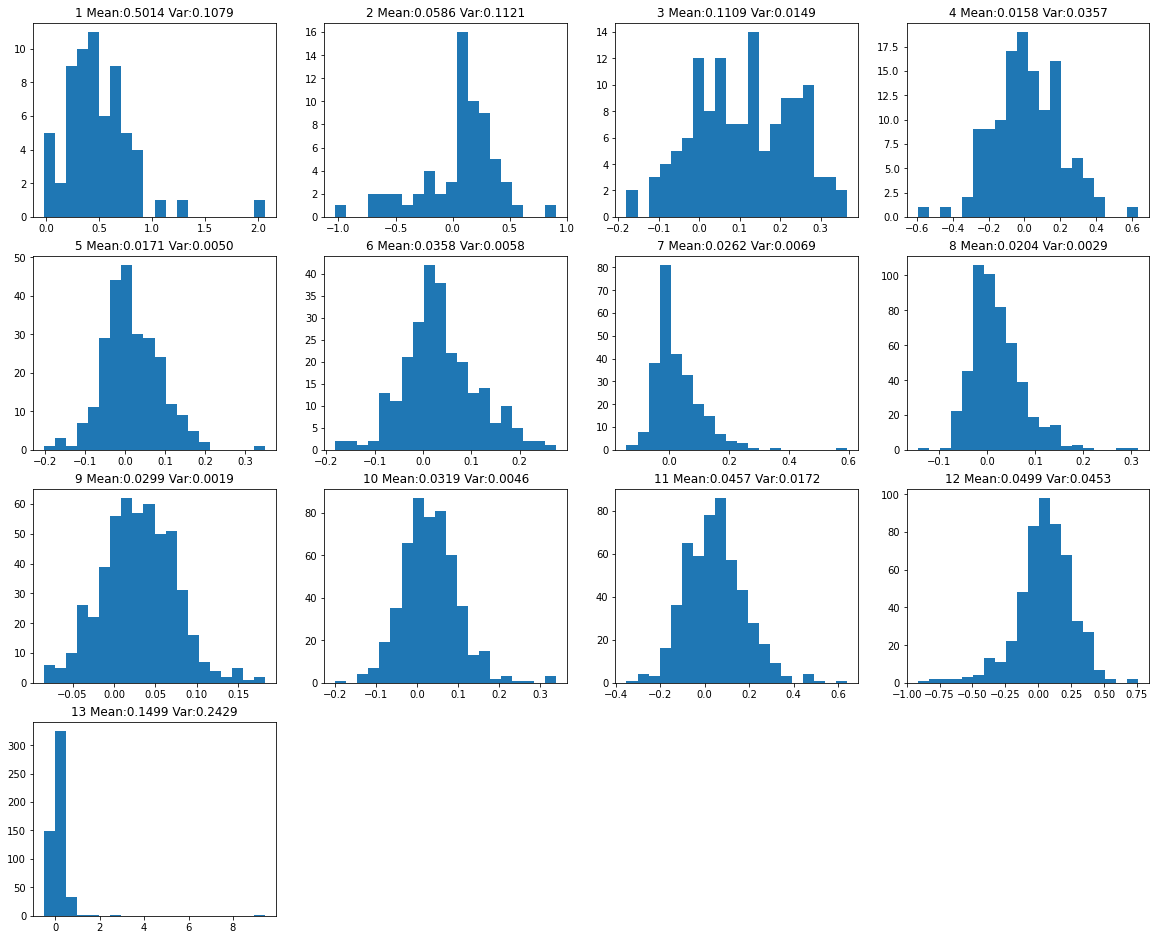

In [9]:
i=0
plt.figure(figsize=(20,25))
for layer in base_model.layers:
    if "conv" in layer.name:
        i+=1
        plt.subplot(6,4,kk[i])
        x=layer.weights[1].numpy().reshape(-1)
        plt.hist(x,bins=20)
        plt.title("%d Mean:%.4f Var:%.4f" %(i,x.mean(),x.var()))

In [10]:
i=0
for layer in model.layers:
    if "conv2d" in layer.name:
        i+=1
        x=layer.weights[1].numpy().reshape(-1)
        print("%d Mean:%.8f Var:%.8f" %(i,x.mean(),x.var()))

1 Mean:0.08254565 Var:0.04589809
2 Mean:-0.00443818 Var:0.00392700
3 Mean:0.00113937 Var:0.00016765
4 Mean:0.00267931 Var:0.00122675
5 Mean:0.00267931 Var:0.00122675
6 Mean:0.00293091 Var:0.00006569
7 Mean:0.00152878 Var:0.00015218
8 Mean:-0.00423914 Var:0.00051872
9 Mean:0.00032997 Var:0.00003783
10 Mean:-0.00017966 Var:0.00001093
11 Mean:-0.00001503 Var:0.00005616
12 Mean:-0.00001503 Var:0.00005616
13 Mean:-0.00028796 Var:0.00002764
14 Mean:0.00004833 Var:0.00000596
15 Mean:-0.00009279 Var:0.00003201
16 Mean:0.00037791 Var:0.00000566
17 Mean:0.00003950 Var:0.00000193
18 Mean:-0.00018914 Var:0.00000495
19 Mean:-0.00018914 Var:0.00000495
20 Mean:0.00033561 Var:0.00002358
21 Mean:0.00009510 Var:0.00000568
22 Mean:-0.00007303 Var:0.00000197


# Resnet50

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(
    weights='imagenet')

102981632/102967424 [==============================] - 2s 0us/step


In [12]:
kkk=[i for i in range(60)]

In [13]:
base_model.layers[13].name.split("_")[-1]

'conv'

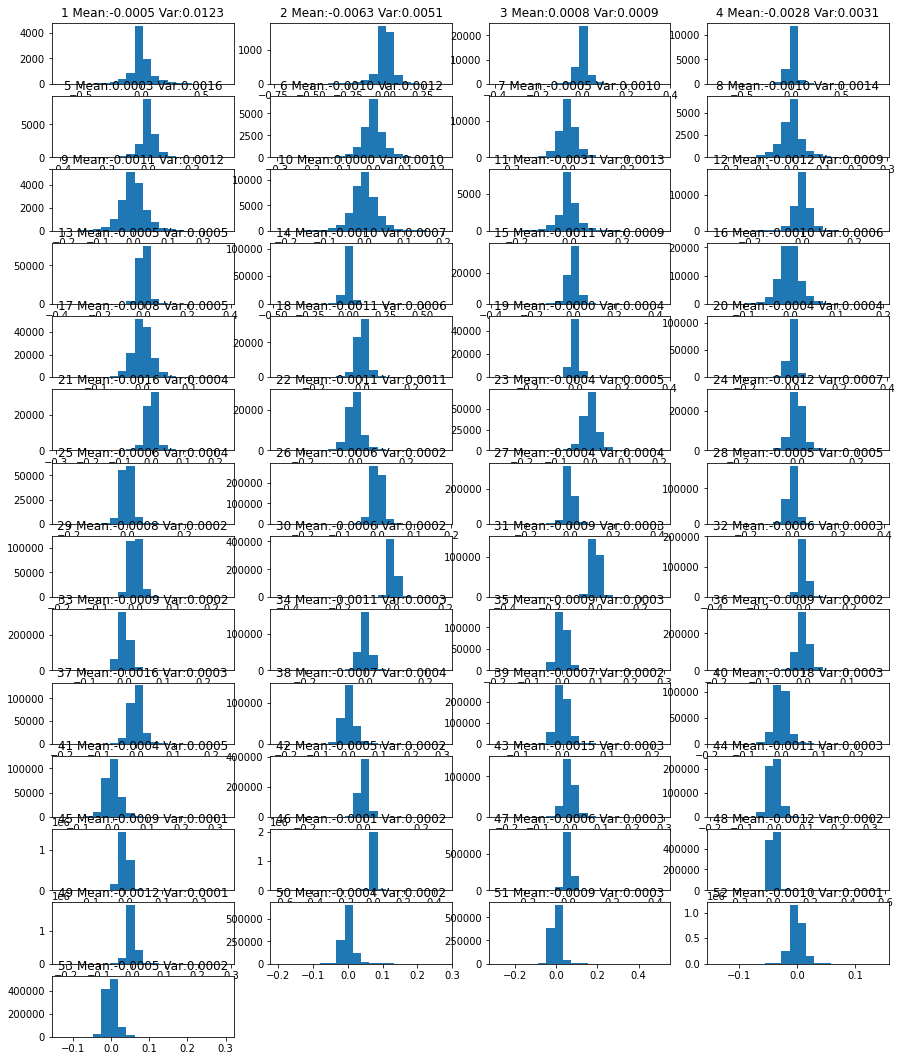

In [14]:
i=0
plt.figure(figsize=(15,20))
for layer in base_model.layers:
    if "conv" in layer.name.split("_")[-1]:
        i+=1
        plt.subplot(15,4,kkk[i])
        x=layer.weights[0].numpy().reshape(-1)
        plt.hist(x,bins=20)
        plt.title("%d Mean:%.4f Var:%.4f" %(i,x.mean(),x.var()))

In [15]:
i=0
for layer in base_model.layers:
    if "conv" in layer.name.split("_")[-1]:
        i+=1
        x=layer.weights[0].numpy().reshape(-1)
        print("%d Mean:%.8f Var:%.8f" %(i,x.mean(),x.var()))

1 Mean:-0.00048974 Var:0.01234744
2 Mean:-0.00626906 Var:0.00510463
3 Mean:0.00079381 Var:0.00092085
4 Mean:-0.00277279 Var:0.00307886
5 Mean:0.00033807 Var:0.00156476
6 Mean:-0.00099355 Var:0.00118851
7 Mean:-0.00048550 Var:0.00103854
8 Mean:-0.00099278 Var:0.00138962
9 Mean:-0.00105223 Var:0.00123248
10 Mean:0.00003229 Var:0.00100207
11 Mean:-0.00306884 Var:0.00129588
12 Mean:-0.00118889 Var:0.00091066
13 Mean:-0.00046391 Var:0.00050210
14 Mean:-0.00098696 Var:0.00071526
15 Mean:-0.00106775 Var:0.00085843
16 Mean:-0.00096774 Var:0.00055183
17 Mean:-0.00080959 Var:0.00045040
18 Mean:-0.00106402 Var:0.00063894
19 Mean:-0.00002013 Var:0.00037908
20 Mean:-0.00042975 Var:0.00035876
21 Mean:-0.00163836 Var:0.00044266
22 Mean:-0.00111016 Var:0.00106212
23 Mean:-0.00035781 Var:0.00053158
24 Mean:-0.00120190 Var:0.00069502
25 Mean:-0.00061293 Var:0.00043377
26 Mean:-0.00056765 Var:0.00023784
27 Mean:-0.00043583 Var:0.00037670
28 Mean:-0.00049968 Var:0.00046032
29 Mean:-0.00075150 Var:0.000223

# Resnet20-0.5

In [16]:
model=tf.keras.models.load_model('../input/cifar10resnet2005/resnet20v1-cifar.h5')

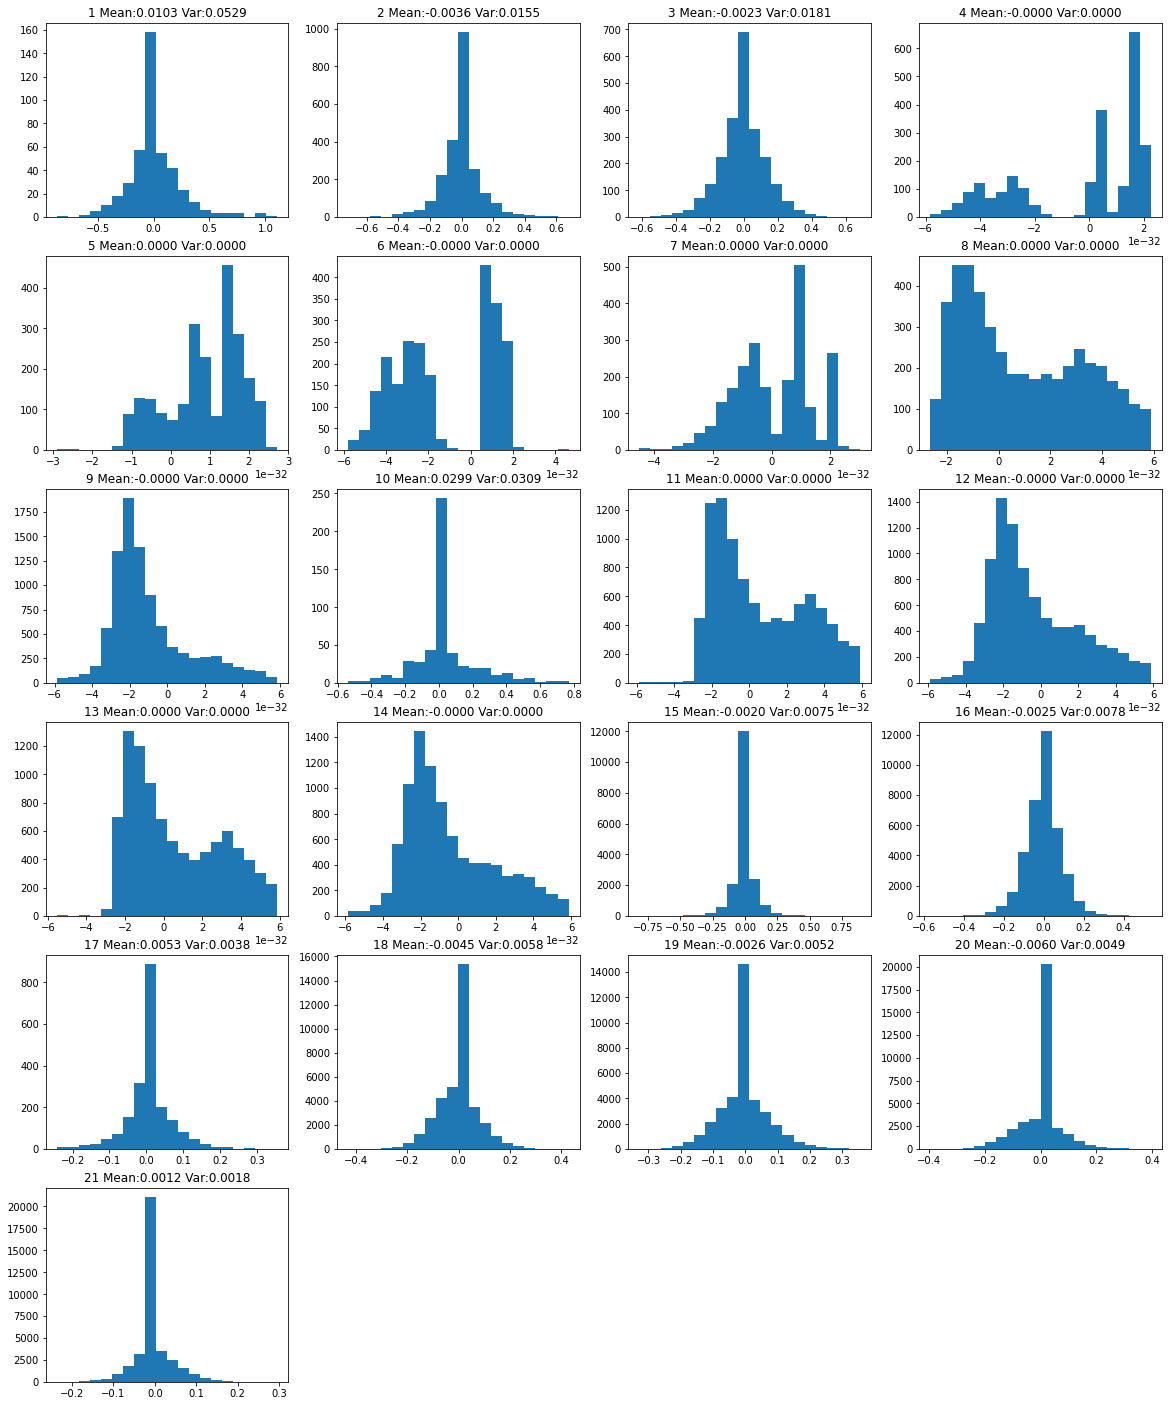

In [17]:
i=0
plt.figure(figsize=(20,25))
for layer in model.layers:
    if "conv2d" in layer.name:
        i+=1
        plt.subplot(6,4,kk[i])
        x=layer.weights[0].numpy().reshape(-1)
        plt.hist(x,bins=20)
        plt.title("%d Mean:%.4f Var:%.4f" %(i,x.mean(),x.var()))

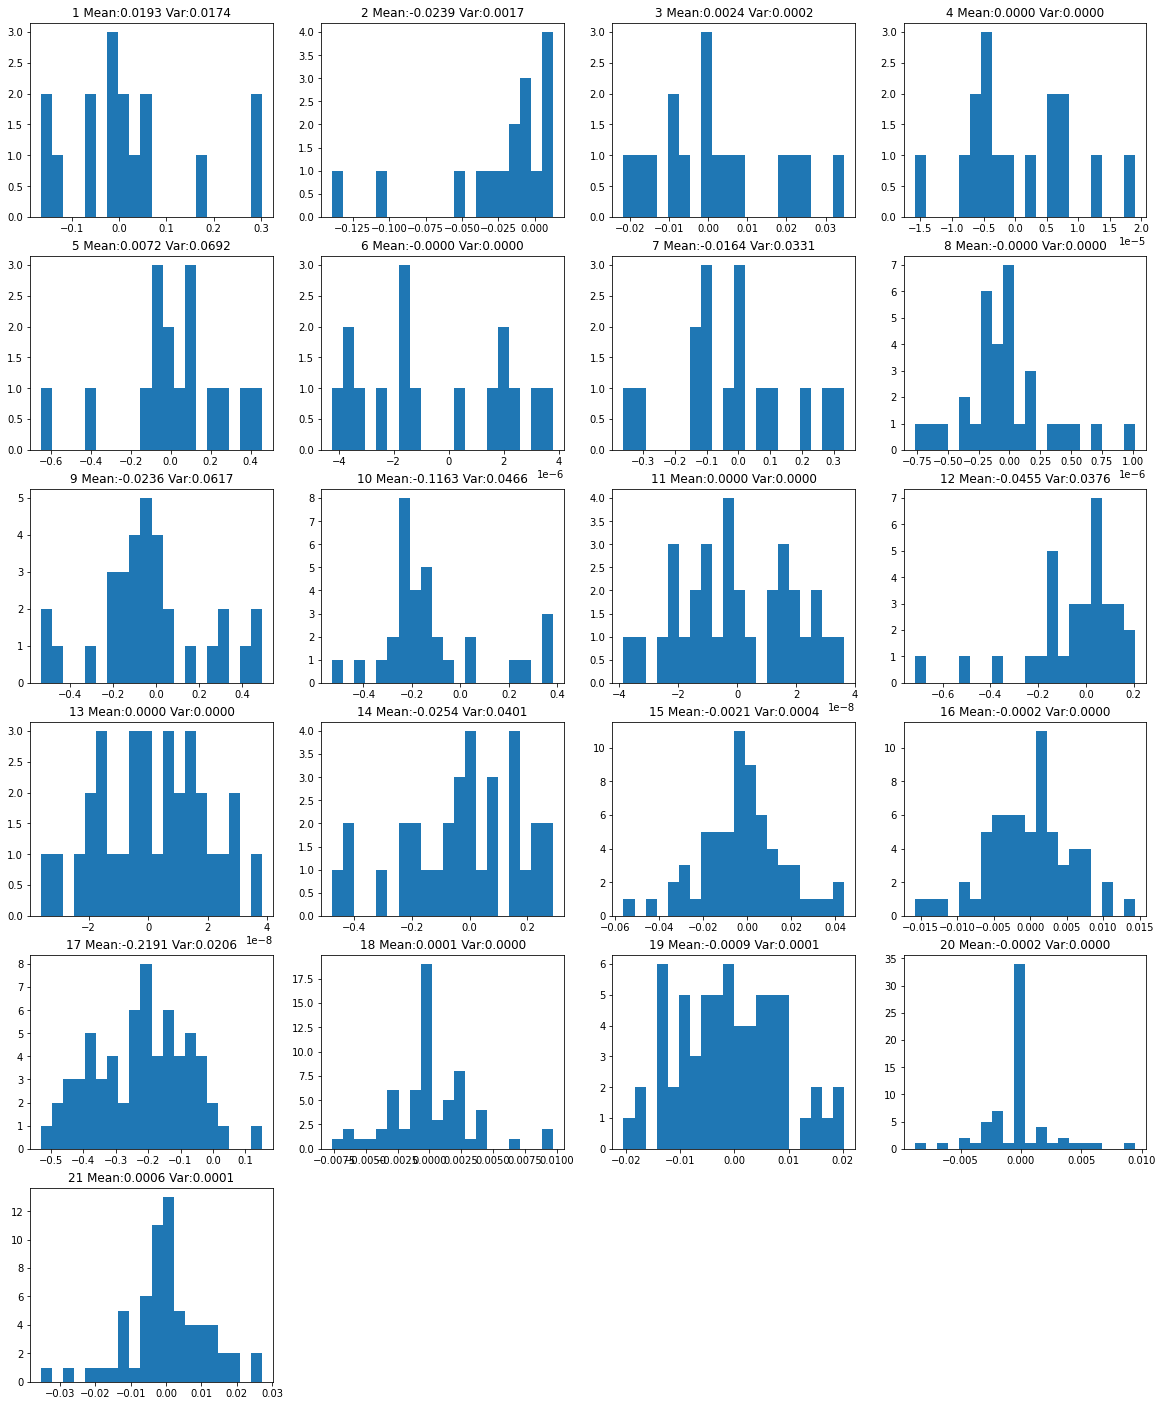

In [18]:
i=0
plt.figure(figsize=(20,25))
for layer in model.layers:
    if "conv2d" in layer.name:
        i+=1
        plt.subplot(6,4,kk[i])
        x=layer.weights[1].numpy().reshape(-1)
        plt.hist(x,bins=20)
        plt.title("%d Mean:%.4f Var:%.4f" %(i,x.mean(),x.var()))

In [19]:
i=0
for layer in model.layers:
    if "conv2d" in layer.name:
        i+=1
        x=layer.weights[0].numpy().reshape(-1)
        print("%d Mean:%.8f Var:%.8f" %(i,x.mean(),x.var()))

1 Mean:0.01034564 Var:0.05289712
2 Mean:-0.00360939 Var:0.01554347
3 Mean:-0.00229226 Var:0.01811488
4 Mean:-0.00000000 Var:0.00000000
5 Mean:0.00000000 Var:0.00000000
6 Mean:-0.00000000 Var:0.00000000
7 Mean:0.00000000 Var:0.00000000
8 Mean:0.00000000 Var:0.00000000
9 Mean:-0.00000000 Var:0.00000000
10 Mean:0.02985771 Var:0.03090186
11 Mean:0.00000000 Var:0.00000000
12 Mean:-0.00000000 Var:0.00000000
13 Mean:0.00000000 Var:0.00000000
14 Mean:-0.00000000 Var:0.00000000
15 Mean:-0.00196846 Var:0.00751773
16 Mean:-0.00249056 Var:0.00779632
17 Mean:0.00534212 Var:0.00375016
18 Mean:-0.00445983 Var:0.00583241
19 Mean:-0.00257461 Var:0.00522764
20 Mean:-0.00595738 Var:0.00491829
21 Mean:0.00122724 Var:0.00184131


In [20]:
i=0
for layer in model.layers:
    if "conv2d" in layer.name:
        i+=1
        x=layer.weights[1].numpy().reshape(-1)
        print("%d Mean:%.8f Var:%.8f" %(i,x.mean(),x.var()))

1 Mean:0.01933520 Var:0.01740501
2 Mean:-0.02394615 Var:0.00171873
3 Mean:0.00240226 Var:0.00024652
4 Mean:0.00000035 Var:0.00000000
5 Mean:0.00724280 Var:0.06922174
6 Mean:-0.00000049 Var:0.00000000
7 Mean:-0.01636102 Var:0.03314358
8 Mean:-0.00000002 Var:0.00000000
9 Mean:-0.02355811 Var:0.06169816
10 Mean:-0.11631547 Var:0.04660600
11 Mean:0.00000000 Var:0.00000000
12 Mean:-0.04554050 Var:0.03759464
13 Mean:0.00000000 Var:0.00000000
14 Mean:-0.02543947 Var:0.04007807
15 Mean:-0.00214948 Var:0.00035126
16 Mean:-0.00018220 Var:0.00003294
17 Mean:-0.21908726 Var:0.02060237
18 Mean:0.00014908 Var:0.00000977
19 Mean:-0.00090486 Var:0.00008761
20 Mean:-0.00024010 Var:0.00000720
21 Mean:0.00057871 Var:0.00012231
